# Tutorial - Comparativo de Municípios de SC

O objetivo deste notebook é exemplificar o uso do dataset para gerar análises da evolução da COVID-19 em municípios de Santa Catarina. Para reproduzir esta visualização é necessário instalar as seguintes bibliotecas Python:

* **pandas**
* **matplotlib**

Para usar as ferramentas de coleta de dados e visualizar os gráficos no próprio notebook é necessário o seguinte:

In [1]:
%matplotlib inline

from tools import load_dataset, today

## Exemplo 1 - Usando dados de todo o Estado

A função `load_dataset` permite carregar tanto os dados atualizados de todo o Estado de SC como selecionar apenas alguns municípios. Por exemplo, para saber **quantos municípios possuem casos notificados** é necessário carregar toda a base.

In [2]:
dados_sc = load_dataset()

# Municípios com casos
(
    dados_sc
    .city
    .unique()
    .size
    -2 # Para excluir casos notificados como outros estados e outros países
)

81

A base permite responder rapidamente algumas perguntas, como o **total de casos no Estado em um determinado dia** e os **10 municípios com mais infectados**.

In [3]:
dia = today()

# Quantidade de casos no dia selecionado
(
    dados_sc[dados_sc.date == dia]
    .total_cases
    .sum()   
)

717.0

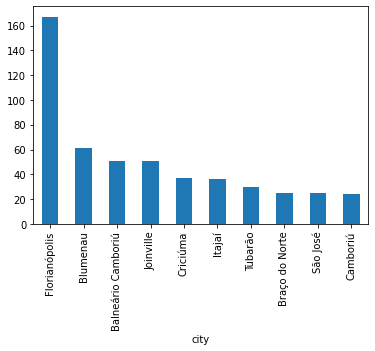

In [4]:
# Municípios com mais infectados
(
    dados_sc[dados_sc.date == dia]
    .groupby('city')
    .total_cases
    .max()
    .sort_values(ascending=False)
    .head(10)
    .plot
    .bar()
)

No entanto, a grande vantagem da série temporal por município é permitir a comparação entre as cidades. Por exemplo: 

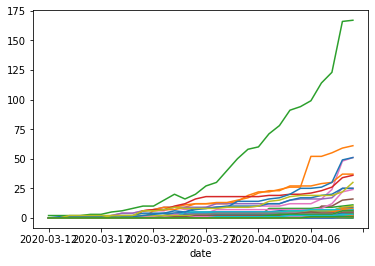

In [5]:
plot = (
    dados_sc
    .set_index('date')
    .groupby('city')
    .total_cases
    .plot(x='date')
)

Como se pode observar acima, a comparação de muitos municípios é prejudicada (e será mais ainda com a evolução da doença). A solução, para uma análise mais detalhada, é fazer um recorte primeiro.

## Exemplo 2 - Filtrando municípios para análise mais detalhada

A função `load_dataset`, quando recebe uma lista de municípios, já faz a carga dos dados segundo essa filtragem. Embora isso possa ser feito após o carregamento de todo o dataset, esse parâmetro pode ser útil para análises comparativas. Por exemplo, vamos comparar a evolução em apenas quatro municípios. 

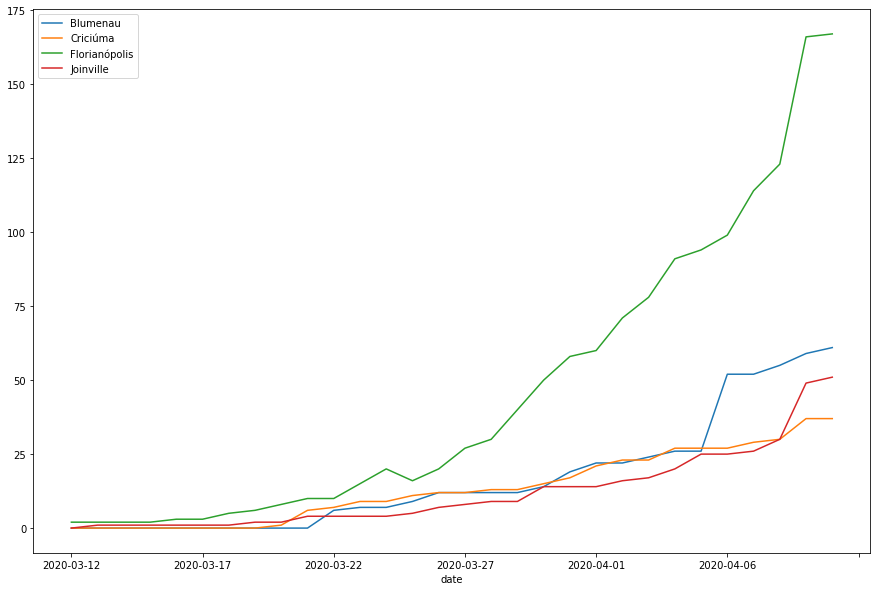

In [6]:
cities = ['Florianópolis', 'Blumenau', 'Joinville', 'Criciúma']

plot = (
    load_dataset(cities)
    .set_index('date')
    .groupby('city')
    .total_cases
    .plot(x='date',
          legend=True,
          figsize=(15,10))
)

## Próximos passos

Algumas ferramentas que facilitam a análise podem ser implementadas, como por exemplo:

* Função para identificar o $d_0$ (primeiro dia) de cada município;
* Cruzamento com base de dados demográficos dos municípios;
* Aplicação de modelos preditivos.

Fique à vontade para contribuir!